In [1]:
# B
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

# Set plot style
plt.style.use('ggplot')

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

# Set font size for all plots
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
84348,60265.0,-0.444105,0.932429,1.061734,0.442784,0.308872,0.110362,1.657681,-0.266612,-0.935282,...,-0.224296,-0.562132,0.036083,-0.033413,-0.058580,-0.712639,-0.215832,-0.245044,122.70,0
164785,116988.0,2.029880,-0.463474,-0.746099,-0.212342,0.010049,0.682050,-0.761391,0.180883,1.131532,...,0.237964,0.967121,0.012035,-0.123093,0.015810,0.187142,0.018731,-0.054236,1.00,0
212050,138692.0,2.021915,-0.489368,-2.239733,-0.651550,0.293227,-1.026795,0.374671,-0.307501,0.525368,...,0.538546,1.622594,-0.274125,0.919298,0.559335,1.419420,-0.160167,-0.094057,54.30,0
135821,81412.0,-5.679371,-5.193757,-0.059366,-1.388139,0.370723,-2.596338,-1.421246,0.826100,1.895436,...,0.144222,0.662938,0.172437,0.652710,-0.469113,-0.360781,0.211417,-0.319398,220.82,0
98768,66808.0,-0.690025,1.351247,0.601611,0.328755,-0.321775,-0.879871,1.021464,0.024334,-1.105674,...,-0.206013,-0.715020,0.222072,0.411985,-0.612979,0.102818,-0.118713,0.068183,81.92,0
221023,142397.0,-8.115498,7.141787,-6.519369,-0.908385,-4.282181,-1.921071,-3.952234,5.641674,0.842072,...,0.469924,0.946739,0.839399,-0.038566,0.337530,-0.126563,0.668623,0.524325,0.74,0
73388,55114.0,-0.739269,0.338291,-0.274506,0.975565,-0.134693,0.513739,0.677126,0.643382,-0.436844,...,0.239691,0.408608,0.368045,-0.700939,-0.227749,-0.267592,0.184484,0.035454,193.00,0
225553,144294.0,2.061777,-0.041485,-1.058479,0.417426,-0.137964,-1.216341,0.192753,-0.342173,0.523384,...,-0.287353,-0.687960,0.339932,0.049481,-0.295653,0.194995,-0.069963,-0.059599,1.79,0
65762,51733.0,1.237992,0.765539,-0.333430,1.346134,0.133668,-1.231315,0.349585,-0.276890,-0.174564,...,-0.061362,-0.076739,-0.130173,0.267258,0.709769,-0.329258,0.038858,0.058690,1.00,0
206360,136178.0,-0.182995,0.027046,0.376375,-2.510054,1.017119,-0.622669,1.024138,-0.515760,-1.355338,...,-0.035421,-0.073993,-0.151150,-1.047011,-0.146820,-0.531927,-0.063071,-0.073107,40.48,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [6]:
df = df.dropna()

In [7]:
df.loc[:, ['Time', 'Amount']].describe()


,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<Axes: title={'center': 'Time Distribution (Seconds)'}, xlabel='Time', ylabel='Density'>

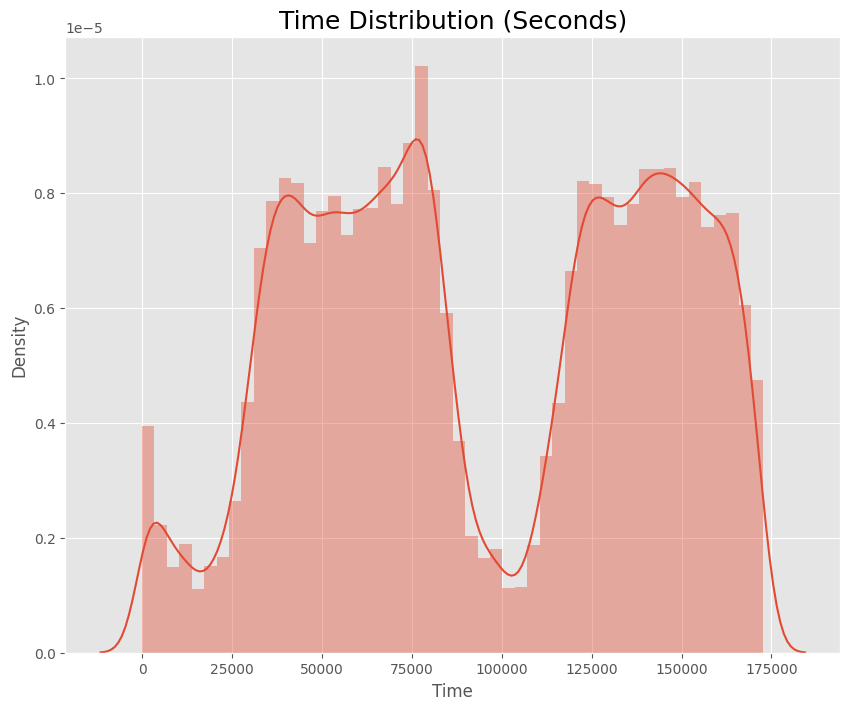

In [8]:
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'])

Bimodal Time

<Axes: title={'center': 'Distribution of Amount'}, xlabel='Amount', ylabel='Density'>

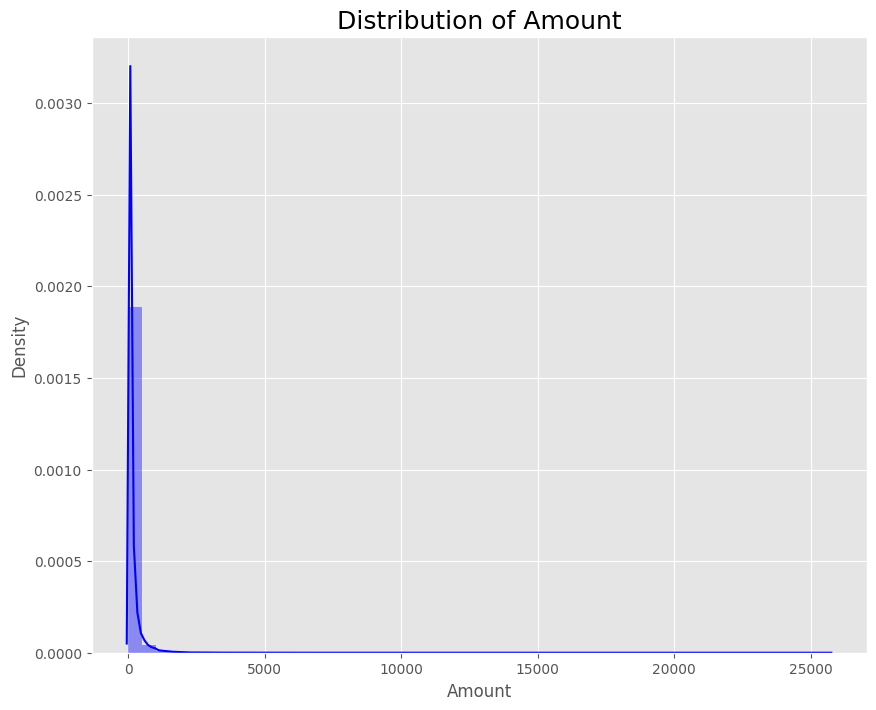

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'], color='blue')

Unimodal amount skewed left

In [10]:
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]
print(f'Fraudulent: {fraud}, Non-fraudulent: {nonfraud}')
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Fraudulent: 492, Non-fraudulent: 284315
Ratio of fraud to non-fraud: 492/284315 (0.173%)


Text(0.5, 0, '0:Non-Fraudulent, 1:Fraudulent')

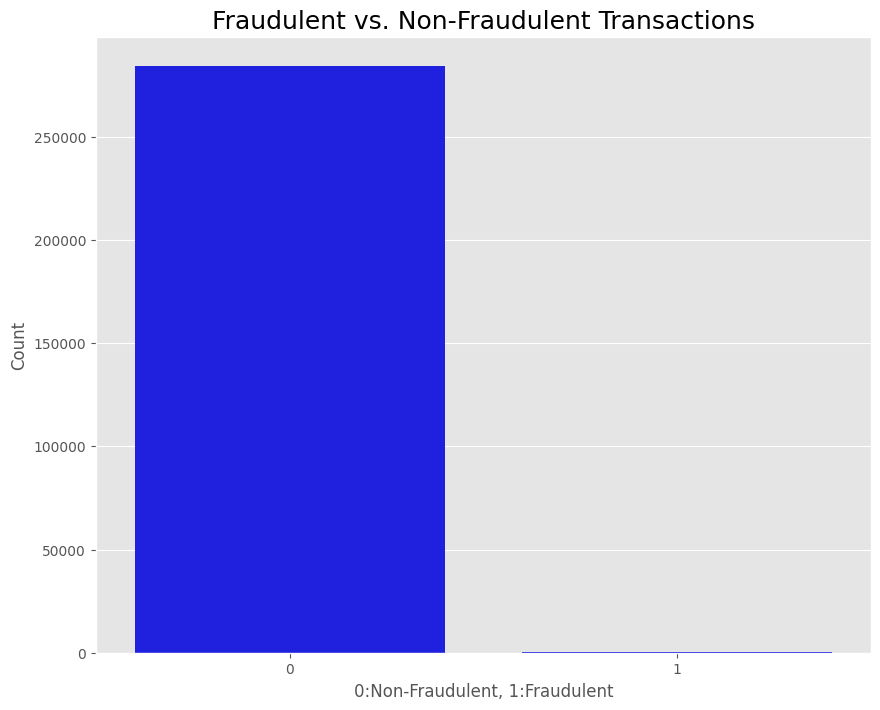

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts(), color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')

Text(0.5, 1.0, 'Correlations')

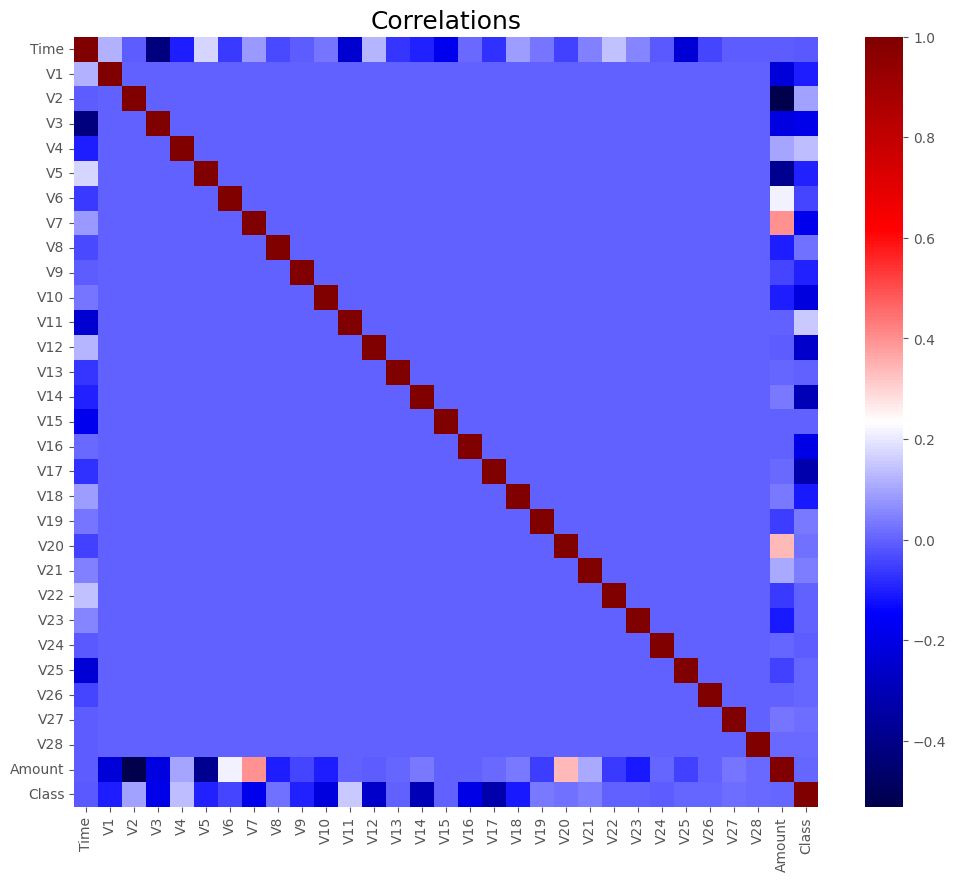

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(), cmap="seismic", annot=False)
plt.title('Correlations')

In [13]:
# Drop the 'Class' column to prepare data for splitting
X = df.drop(columns=['Class'])

# Get the target variable
y = df['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                          , test_size=0.2
                                                          , stratify=df['Class']
                                                          , random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval
#                                                   , test_size=0.25
#                                                   , stratify=y_trainval
#                                                   , random_state=42)


In [15]:
max_in_columns = {}
min_in_columns = {}
for idx in X:
    max_in_columns[idx] = max(X[idx])
    min_in_columns[idx] = min(X[idx])

In [16]:
max_in_columns

{'Time': 172792.0,
 'V1': 2.45492999121121,
 'V2': 22.0577289904909,
 'V3': 9.38255843282114,
 'V4': 16.8753440335975,
 'V5': 34.8016658766686,
 'V6': 73.3016255459646,
 'V7': 120.589493945238,
 'V8': 20.0072083651213,
 'V9': 15.5949946071278,
 'V10': 23.7451361206545,
 'V11': 12.0189131816199,
 'V12': 7.8483920756446,
 'V13': 7.12688295859376,
 'V14': 10.5267660517847,
 'V15': 8.87774159774277,
 'V16': 17.3151115176278,
 'V17': 9.25352625047285,
 'V18': 5.04106918541184,
 'V19': 5.59197142733558,
 'V20': 39.4209042482199,
 'V21': 27.2028391573154,
 'V22': 10.5030900899454,
 'V23': 22.5284116897749,
 'V24': 4.58454913689817,
 'V25': 7.51958867870916,
 'V26': 3.5173456116238,
 'V27': 31.6121981061363,
 'V28': 33.8478078188831,
 'Amount': 25691.16}

In [17]:
# Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the training, validation, and test sets using the scaler
X_train_std = scaler.transform(X_train)
# X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

In [18]:
X_train_std

array([[ 1.41158751,  0.99337908, -0.45603659, ...,  0.19191152,
        -0.09910576, -0.32249376],
       [ 0.62314085,  1.03850725, -0.02934912, ...,  0.00639701,
        -0.21152423, -0.33976388],
       [-1.13068022, -0.50676613,  0.36606499, ...,  0.09413695,
         0.56642647,  0.34669349],
       ...,
       [-1.25471074,  0.54569899,  0.04401572, ...,  0.07676455,
         0.07564817, -0.17053266],
       [-1.48398822,  0.65325241,  0.18256566, ..., -0.14759091,
        -0.0184768 , -0.34813969],
       [-1.39061787, -0.30573748,  0.47027277, ...,  0.93509494,
         0.63073809, -0.32380996]])

In [19]:
# Logistic Regression
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_std, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

In [20]:
model = logistic_grid.best_estimator_

In [21]:
y_pred = model.predict(X_test)

In [22]:
x_linespace = range(len(X_test))

<Axes: ylabel='Class'>

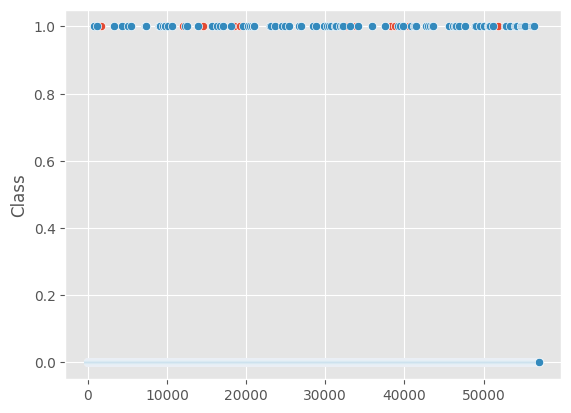

In [23]:
sns.scatterplot(x=x_linespace, y=y_pred)
sns.scatterplot(x=x_linespace, y=y_test)

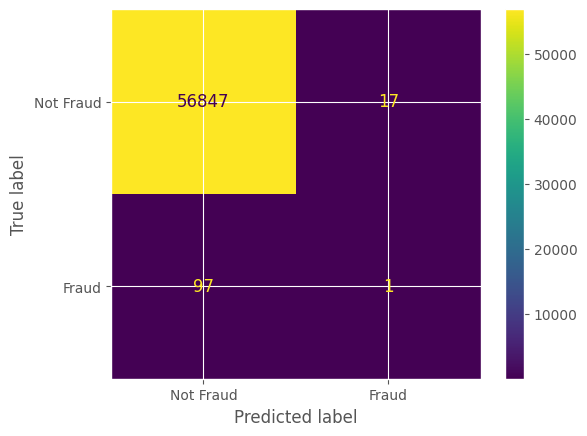

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Fraud', 'Fraud'])
cm_display.plot()
plt.show()

In [25]:
input_vals = [random.uniform(min_in_columns[idx], max_in_columns[idx]) for idx in min_in_columns]
i = 0
for idx in min_in_columns:
    val = input(f'Give me a value for the {idx} ({min_in_columns[idx]}, {max_in_columns[idx]})')
    if val:
        input_vals[i] = float(val)
    i+=1
input_vals = np.array(input_vals)
input_vals = input_vals.reshape(1,30)
prediction = model.predict(input_vals)
fraud = 'a fraud' if prediction else 'not a fraud'
print(f'This transaction is {fraud}')

Give me a value for the Time (0.0, 172792.0) 
Give me a value for the V1 (-56.407509631329, 2.45492999121121) 
Give me a value for the V2 (-72.7157275629303, 22.0577289904909) 
Give me a value for the V3 (-48.3255893623954, 9.38255843282114) 
Give me a value for the V4 (-5.68317119816995, 16.8753440335975) 
Give me a value for the V5 (-113.743306711146, 34.8016658766686) 
Give me a value for the V6 (-26.1605059358433, 73.3016255459646) 
Give me a value for the V7 (-43.5572415712451, 120.589493945238) 
Give me a value for the V8 (-73.2167184552674, 20.0072083651213) 
Give me a value for the V9 (-13.4340663182301, 15.5949946071278) 
Give me a value for the V10 (-24.5882624372475, 23.7451361206545) 
Give me a value for the V11 (-4.79747346479757, 12.0189131816199) 
Give me a value for the V12 (-18.6837146333443, 7.8483920756446) 
Give me a value for the V13 (-5.79188120632084, 7.12688295859376) 
Give me a value for the V14 (-19.2143254902614, 10.5267660517847) 
Give me a value for the V15

This transaction is not a fraud
